<a href="https://colab.research.google.com/github/anish2105/Natural-Language-Processing-NLP-Basics/blob/main/NLP_Tweet_Sentiment_Analyzer(RNN_%26_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tweet Sentiment Analysis using RNN and LSTM**

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer

In [6]:
df=pd.read_excel('/content/TweetSentiment_60 (1).xlsx')
df

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
101154,4,@jessikasay congrats on the followers
101155,4,@dannywood As in &quot;back dat ass on up in h...
101156,4,School In about 12 minutes then I get picked u...
101157,4,@itsMeeeech -- sounds fun!


In [7]:
df['tweet'] = df['tweet'].astype(str)

In [8]:
df['processed_tweets'] = df['tweet'].str.lower()
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [9]:
print("\nOriginal Tweet:",df['tweet'][0])
print(df['processed_tweets'][0])


Original Tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d


In [10]:
len(df['processed_tweets'])

101159

**Removal of @ and User names**

In [11]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = tknzr.tokenize(df['processed_tweets'][a])
  res=" ".join(result)
  df['processed_tweets'][a]=res
print("\nTokenize a twitter text:")
print(df['processed_tweets'][10])


<ipython-input-11-356bb5f68325>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=res



Tokenize a twitter text:
spring break in plain city ... it's snowing


In [12]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww , that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball . managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no , it's not behaving at all . i'm mad . why ..."


**Remove Punctuations**

In [13]:
punct_to_remove = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('','',punct_to_remove))

df['processed_tweets'] = df['processed_tweets'].apply(lambda text:remove_punctuation(text))
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",httptwitpiccom2y1zl awww thats a bummer you...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


**Remove URLs**

In [14]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [15]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = remove_URL(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No URLs:")
print(result)

<ipython-input-15-056f0551ee61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


No URLs:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [16]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


**Remove Emoji**

In [17]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [18]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoji(df['processed_tweets'][a])
  df['processed_tweets'][a]=result

<ipython-input-18-410463c71472>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


**Removal of Emoticons**

In [19]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [20]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [21]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoticons(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No Emoticons:")
print(result)

<ipython-input-21-5918f88f12da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


No Emoticons:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [22]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


In [23]:
df.isna().sum()

target              0
tweet               0
processed_tweets    0
dtype: int64

**Labeling the target fields**

In [24]:
df['target'].value_counts()

4    51150
0    50009
Name: target, dtype: int64

In [25]:
df['Target']=df['target'].replace(4,1)
df['Target'].value_counts()

1    51150
0    50009
Name: Target, dtype: int64

In [26]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

**Stop Words**

In [27]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [28]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


 #apply function   
df['processed_tweets'] = df['processed_tweets'].apply(lambda text: cleaning_stopwords(text))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [29]:
dataset = df.drop('tweet',axis=1)
dataset

,target,processed_tweets,Target
0,0,awww thats bummer shoulda got david carr third...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,dived many times ball managed save 50 rest go ...,0
3,0,whole body feels itchy like fire,0
4,0,no not behaving im mad cant see over,0
...,...,...,...
101154,4,congrats followers,1
101155,4,back dat ass full service,1
101156,4,school 12 minutes get picked morgan,1
101157,4,sounds fun,1


**Stemming**

In [30]:
# import nltk
# st = nltk.PorterStemmer()
# def stemming_on_text(data):
#     text = [st.stem(word) for word in data]
#     return data
# df['processed_tweets']= df['processed_tweets'].apply(lambda x: stemming_on_text(x))
# df['processed_tweets'].head()

**Lemmentization**

In [31]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['processed_tweets'] = df['processed_tweets'].apply(lambda x: lemmatizer_on_text(x))
df['processed_tweets'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [32]:
X = df['processed_tweets']
y = df['Target']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,random_state = 42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(91043,)
(10116,)


In [34]:
print(y_train.shape)
print(y_test.shape)

(91043,)
(10116,)


In [35]:
X_test

10538                                     ummmm wanna come
89283    lol aww celebrate earlier get loads complitmen...
40354             downloading 22nd episode heroes season 3
11834                                 going sleep im tired
585      cant set feet ground missing eyelid people mig...
                               ...                        
77266         oop hick ups oop nope awwwww wanted hick ups
51995    back 2 mile walk woobie doggie yet another stu...
22770              noooooo boo computer problems empathise
61798    hrm guess hit sack work 6 hours 9 hours later ...
36296                home justins farewell dinner dont die
Name: processed_tweets, Length: 10116, dtype: object

**Text Sequencing**

In [38]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower = False)
tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)
tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)
test_text_vec

[[7002, 108, 68],
 [20, 307, 1608, 735, 6, 991, 52122, 308, 586, 852],
 [1728, 5511, 713, 2173, 517, 53],
 [12, 44, 1, 90],
 [15, 464, 848, 2085, 238, 15458, 75, 218, 6],
 [76, 99, 95, 264, 635, 9, 301, 10, 43, 5, 43, 758, 63, 16, 395, 1380, 53, 8],
 [33, 128, 23, 147, 252, 52123, 665, 95],
 [56, 103, 7, 8, 35, 23, 274, 301, 1304, 574, 194],
 [1008, 49, 12, 37, 70, 233, 4892, 182, 86, 311],
 [2860, 75, 142, 1547, 1611],
 [23, 133, 813, 1, 96, 1868, 816, 63, 6018, 658, 7496, 22710, 10076, 11, 4362],
 [364, 381, 34, 11, 142, 8, 5],
 [20, 13956, 503, 30, 1978, 9745],
 [68, 1639, 52124, 949, 79, 714],
 [106, 4, 3855, 21743, 19, 202, 1095, 2707, 180, 284, 72],
 [2548,
  226,
  8539,
  11,
  3229,
  2045,
  244,
  98,
  449,
  1,
  441,
  1440,
  3,
  13015,
  118,
  940],
 [10706, 2828, 48],
 [35, 227, 52125, 648, 215, 7, 2428, 325, 154, 99, 101, 648, 52126],
 [102, 1331, 246],
 [4, 267],
 [10, 187, 107],
 [985, 807, 639, 4, 125, 5002, 511, 579],
 [1173, 4731, 4410, 2717, 227, 2458, 916, 12

In [40]:
lenght = []
for i in (train_text_vec + test_text_vec):
  if 10<len(i)<28:
    lenght.append(len(i))
max(lenght)

27

**We can leave the maximun word length is 28**

In [46]:
#pad the sequences 

from keras.preprocessing import sequence
max_words = 28
X_train = keras.utils.pad_sequences(train_text_vec, maxlen=max_words)
X_test = keras.utils.pad_sequences(test_text_vec, maxlen=max_words)
modelRNN = None
modelLSTM = None
print("After Padding x[train[0]=\n" , X_test[0])

After Padding x[train[0]=
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 7002  108   68]


**End of data padding**

**Modelling**

In [47]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 55313 unique tokens.


In [49]:
vocabulary_size = len((train_text_vec + test_text_vec))*2

**Glove Embeddings**

In [51]:
#Glove
embeddings_index = {}
f = open('/content/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 92739 word vectors.


In [52]:
#embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
# embedding_matrix.shape

**Recurrent Neural Network(RNN)**

In [53]:
#Now create a simple RNN model and lets see the accuracy
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

In [54]:
embedding_size=100


modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size,embedding_size,weights = [embedding_matrix],input_length=max_words)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           20231800  
                                                                 
 dropout (Dropout)           (None, 28, 100)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 150)               37650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 20,269,601
Trainable params: 20,269,601
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [56]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [57]:
history = modelRNN.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listRNN)
modelRNN.save_weights("my_modRNN_Latest")

Epoch 1/20
87/88 [============================>.] - ETA: 0s - loss: 1.3589 - accuracy: 0.5339

88/88 [==============================] - 7s 51ms/step - loss: 1.3548 - accuracy: 0.5342 - val_loss: 0.9248 - val_accuracy: 0.6201
Epoch 2/20
87/88 [============================>.] - ETA: 0s - loss: 0.8035 - accuracy: 0.5932

88/88 [==============================] - 4s 44ms/step - loss: 0.8026 - accuracy: 0.5932 - val_loss: 0.6743 - val_accuracy: 0.6641
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.6461

88/88 [==============================] - 4s 44ms/step - loss: 0.6639 - accuracy: 0.6461 - val_loss: 0.5885 - val_accuracy: 0.7158
Epoch 4/20
88/88 [==============================] - ETA: 0s - loss: 0.6043 - accuracy: 0.6901

88/88 [==============================] - 4s 44ms/step - loss: 0.6043 - accuracy: 0.6901 - val_loss: 0.5453 - val_accuracy: 0.7490
Epoch 5/20
88/88 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7159

88/88 [==============================] - 4s 44ms/step - loss: 0.5694 - accuracy: 0.7159 - val_loss: 0.5203 - val_accuracy: 0.7549
Epoch 6/20
88/88 [==============================] - ETA: 0s - loss: 0.5482 - accuracy: 0.7301

88/88 [==============================] - 4s 45ms/step - loss: 0.5482 - accuracy: 0.7301 - val_loss: 0.5096 - val_accuracy: 0.7549
Epoch 7/20
87/88 [============================>.] - ETA: 0s - loss: 0.5287 - accuracy: 0.7459

88/88 [==============================] - 4s 43ms/step - loss: 0.5286 - accuracy: 0.7459 - val_loss: 0.5119 - val_accuracy: 0.7559
Epoch 8/20
87/88 [============================>.] - ETA: 0s - loss: 0.5131 - accuracy: 0.7578

88/88 [==============================] - 4s 44ms/step - loss: 0.5132 - accuracy: 0.7577 - val_loss: 0.4896 - val_accuracy: 0.7666
Epoch 9/20
87/88 [============================>.] - ETA: 0s - loss: 0.5000 - accuracy: 0.7655

88/88 [==============================] - 4s 45ms/step - loss: 0.4997 - accuracy: 0.7656 - val_loss: 0.4828 - val_accuracy: 0.7666
Epoch 10/20
88/88 [==============================] - ETA: 0s - loss: 0.4888 - accuracy: 0.7732

88/88 [==============================] - 4s 44ms/step - loss: 0.4888 - accuracy: 0.7732 - val_loss: 0.4841 - val_accuracy: 0.7705
Epoch 11/20
88/88 [==============================] - ETA: 0s - loss: 0.4834 - accuracy: 0.7761

88/88 [==============================] - 4s 44ms/step - loss: 0.4834 - accuracy: 0.7761 - val_loss: 0.4776 - val_accuracy: 0.7754
Epoch 12/20
88/88 [==============================] - ETA: 0s - loss: 0.4725 - accuracy: 0.7833

88/88 [==============================] - 4s 44ms/step - loss: 0.4725 - accuracy: 0.7833 - val_loss: 0.4793 - val_accuracy: 0.7715
Epoch 13/20
87/88 [============================>.] - ETA: 0s - loss: 0.4654 - accuracy: 0.7873

88/88 [==============================] - 4s 44ms/step - loss: 0.4656 - accuracy: 0.7872 - val_loss: 0.4721 - val_accuracy: 0.7803
Epoch 14/20
87/88 [============================>.] - ETA: 0s - loss: 0.4596 - accuracy: 0.7918

88/88 [==============================] - 4s 45ms/step - loss: 0.4595 - accuracy: 0.7919 - val_loss: 0.4712 - val_accuracy: 0.7793
Epoch 15/20
87/88 [============================>.] - ETA: 0s - loss: 0.4508 - accuracy: 0.7976

88/88 [==============================] - 4s 46ms/step - loss: 0.4507 - accuracy: 0.7977 - val_loss: 0.4694 - val_accuracy: 0.7744
Epoch 16/20
88/88 [==============================] - ETA: 0s - loss: 0.4479 - accuracy: 0.7989

88/88 [==============================] - 6s 70ms/step - loss: 0.4479 - accuracy: 0.7989 - val_loss: 0.4630 - val_accuracy: 0.7949
Epoch 17/20
88/88 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.8029

88/88 [==============================] - 5s 55ms/step - loss: 0.4420 - accuracy: 0.8029 - val_loss: 0.4691 - val_accuracy: 0.7773
Epoch 18/20
87/88 [============================>.] - ETA: 0s - loss: 0.4375 - accuracy: 0.8059

88/88 [==============================] - 4s 44ms/step - loss: 0.4374 - accuracy: 0.8060 - val_loss: 0.4704 - val_accuracy: 0.7842
Epoch 19/20
88/88 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.8061

88/88 [==============================] - 4s 44ms/step - loss: 0.4375 - accuracy: 0.8061 - val_loss: 0.4657 - val_accuracy: 0.7891
Epoch 20/20
88/88 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.8135

88/88 [==============================] - 4s 44ms/step - loss: 0.4239 - accuracy: 0.8135 - val_loss: 0.4713 - val_accuracy: 0.7920


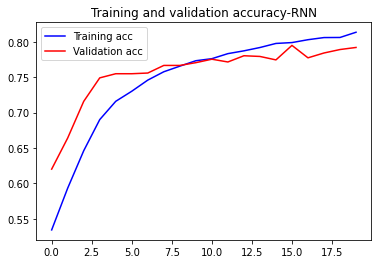

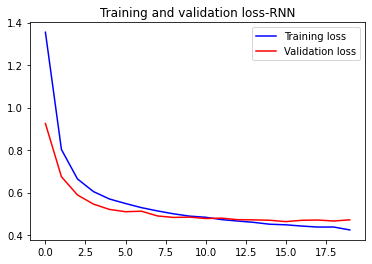

In [58]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()
 
plt.show()

**Loading the last epoch modeln (Optional)**

In [59]:
#Loading the last epoch model
modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(SimpleRNN(150,activation = "tanh")) 
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
modelRNN.load_weights("my_modRNN_Latest")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 100)           20231800  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20,269,601
Trainable params: 20,269,601
Non-trainable params: 0
_________________________________________________________________


None


**LTSM**

In [60]:
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modLSTM_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [61]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [62]:
embedding_size=100
modelLSTM=Sequential()
modelLSTM.add(Embedding(vocabulary_size,100,weights = [embedding_matrix],input_length=28)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelLSTM.add(Dropout(0.70))
modelLSTM.add(LSTM(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelLSTM.add(Dropout(0.15))
modelLSTM.add(Dense(1, activation='sigmoid'))
print(modelLSTM.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 28, 100)           20231800  
                                                                 
 dropout_2 (Dropout)         (None, 28, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20,382,551
Trainable params: 20,382,551
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
modelLSTM.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [64]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [65]:
LSTMhistory = modelLSTM.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listLSTM)
modelLSTM.save_weights("my_modLSTM_Latest")

Epoch 1/20
88/88 [==============================] - ETA: 0s - loss: 1.2036 - accuracy: 0.5729

88/88 [==============================] - 6s 34ms/step - loss: 1.2036 - accuracy: 0.5729 - val_loss: 0.6926 - val_accuracy: 0.6631
Epoch 2/20
88/88 [==============================] - ETA: 0s - loss: 0.6484 - accuracy: 0.6488

88/88 [==============================] - 2s 26ms/step - loss: 0.6484 - accuracy: 0.6488 - val_loss: 0.5783 - val_accuracy: 0.7246
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 0.5890 - accuracy: 0.6959

88/88 [==============================] - 2s 27ms/step - loss: 0.5890 - accuracy: 0.6959 - val_loss: 0.5343 - val_accuracy: 0.7461
Epoch 4/20
88/88 [==============================] - ETA: 0s - loss: 0.5536 - accuracy: 0.7257

88/88 [==============================] - 2s 27ms/step - loss: 0.5536 - accuracy: 0.7257 - val_loss: 0.5089 - val_accuracy: 0.7490
Epoch 5/20
87/88 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7408

88/88 [==============================] - 2s 27ms/step - loss: 0.5315 - accuracy: 0.7410 - val_loss: 0.4953 - val_accuracy: 0.7598
Epoch 6/20
88/88 [==============================] - ETA: 0s - loss: 0.5141 - accuracy: 0.7524

88/88 [==============================] - 2s 27ms/step - loss: 0.5141 - accuracy: 0.7524 - val_loss: 0.4847 - val_accuracy: 0.7637
Epoch 7/20
88/88 [==============================] - ETA: 0s - loss: 0.5003 - accuracy: 0.7621

88/88 [==============================] - 2s 27ms/step - loss: 0.5003 - accuracy: 0.7621 - val_loss: 0.4853 - val_accuracy: 0.7686
Epoch 8/20
87/88 [============================>.] - ETA: 0s - loss: 0.4875 - accuracy: 0.7718

88/88 [==============================] - 2s 27ms/step - loss: 0.4879 - accuracy: 0.7716 - val_loss: 0.4762 - val_accuracy: 0.7734
Epoch 9/20
87/88 [============================>.] - ETA: 0s - loss: 0.4793 - accuracy: 0.7765

88/88 [==============================] - 2s 27ms/step - loss: 0.4795 - accuracy: 0.7764 - val_loss: 0.4708 - val_accuracy: 0.7803
Epoch 10/20
87/88 [============================>.] - ETA: 0s - loss: 0.4708 - accuracy: 0.7829

88/88 [==============================] - 2s 27ms/step - loss: 0.4705 - accuracy: 0.7830 - val_loss: 0.4687 - val_accuracy: 0.7773
Epoch 11/20
87/88 [============================>.] - ETA: 0s - loss: 0.4611 - accuracy: 0.7890

88/88 [==============================] - 2s 27ms/step - loss: 0.4612 - accuracy: 0.7888 - val_loss: 0.4656 - val_accuracy: 0.7793
Epoch 12/20
88/88 [==============================] - ETA: 0s - loss: 0.4555 - accuracy: 0.7924

88/88 [==============================] - 2s 27ms/step - loss: 0.4555 - accuracy: 0.7924 - val_loss: 0.4615 - val_accuracy: 0.7832
Epoch 13/20
88/88 [==============================] - ETA: 0s - loss: 0.4457 - accuracy: 0.7979

88/88 [==============================] - 2s 27ms/step - loss: 0.4457 - accuracy: 0.7979 - val_loss: 0.4634 - val_accuracy: 0.7783
Epoch 14/20
87/88 [============================>.] - ETA: 0s - loss: 0.4383 - accuracy: 0.8029

88/88 [==============================] - 2s 27ms/step - loss: 0.4385 - accuracy: 0.8029 - val_loss: 0.4656 - val_accuracy: 0.7715
Epoch 15/20
87/88 [============================>.] - ETA: 0s - loss: 0.4343 - accuracy: 0.8062

88/88 [==============================] - 2s 27ms/step - loss: 0.4346 - accuracy: 0.8062 - val_loss: 0.4668 - val_accuracy: 0.7773
Epoch 16/20
87/88 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8094

88/88 [==============================] - 2s 27ms/step - loss: 0.4276 - accuracy: 0.8093 - val_loss: 0.4685 - val_accuracy: 0.7764
Epoch 17/20
87/88 [============================>.] - ETA: 0s - loss: 0.4176 - accuracy: 0.8176

88/88 [==============================] - 2s 27ms/step - loss: 0.4177 - accuracy: 0.8177 - val_loss: 0.4703 - val_accuracy: 0.7803
Epoch 18/20
87/88 [============================>.] - ETA: 0s - loss: 0.4105 - accuracy: 0.8217

88/88 [==============================] - 2s 27ms/step - loss: 0.4105 - accuracy: 0.8217 - val_loss: 0.4797 - val_accuracy: 0.7842
Epoch 19/20
87/88 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8232

88/88 [==============================] - 2s 27ms/step - loss: 0.4053 - accuracy: 0.8231 - val_loss: 0.4719 - val_accuracy: 0.7754
Epoch 20/20
87/88 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8264

88/88 [==============================] - 2s 27ms/step - loss: 0.4003 - accuracy: 0.8264 - val_loss: 0.4827 - val_accuracy: 0.7793


**Performace Measure**

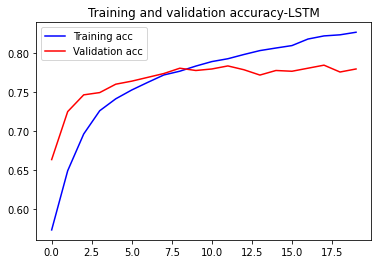

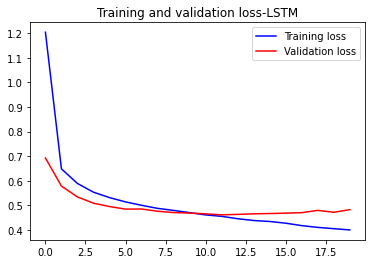

In [66]:
import matplotlib.pyplot as plt
acc = modelLSTM.history.history['accuracy']
val_acc = modelLSTM.history.history['val_accuracy']
loss = modelLSTM.history.history['loss']
val_loss = modelLSTM.history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-LSTM')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-LSTM')
plt.legend()
 
plt.show()

**Confusion Matrix and classification report**

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
cf_matrix=confusion_matrix(y_test, y_predict.round())

In [69]:
y_predict = modelRNN.predict(X_test)
print(classification_report(y_test, y_predict.round()))

317/317 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      4986
           1       0.59      0.66      0.62      5130

    accuracy                           0.60     10116
   macro avg       0.60      0.60      0.60     10116
weighted avg       0.60      0.60      0.60     10116



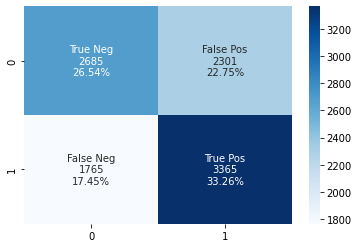

In [72]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

**Custom tweet for extra test**

In [73]:
test_data=['today is a sad day','he was happy today','not a good job']

In [74]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test = pad_sequences(x_test, maxlen=28)
x_test

<ipython-input-74-6267be619ffd>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test  = np.array( tokenizer.texts_to_sequences(test_data))


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
         61,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          4, 276]], dtype=int32)

In [75]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])
  
  res=modelRNN.predict(x_test)
  if res[i]>0.3:
    print('Sentiment type:Positive',res[i])
  else:
    print('Sentiment type:Negative',res[i])
  print('==================================================\n')

Test sentence:- today is a sad day
1/1 [==============================] - 0s 16ms/step
Sentiment type:Negative [0.03072486]

Test sentence:- he was happy today
1/1 [==============================] - 0s 15ms/step
Sentiment type:Positive [0.40976137]

Test sentence:- not a good job
1/1 [==============================] - 0s 17ms/step
Sentiment type:Positive [0.48301825]



**Building a function to convert words into vector**

In [76]:
#pre- processing custom tweets ()
def preprocess_tweets(tweet):
    #fo = open('/content/stopwords.txt', "r+")
    #stop_words = list(fo.read().split(','))
    #translation={39:None}
    processed_tweet = tweet
    processed_tweet=re.sub('\d+', '',tweet)
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",processed_tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(STOPWORDS))
    
    return(processed_tweet)

In [77]:
def tweet_to_vector(text):
  print('Original tweet:-',text)
  text=preprocess_tweets(text)
  print('Processed tweet:- '+text)
  text=text.split(' ')
  tokenizer = Tokenizer(lower=False)
  tokenizer.fit_on_texts(text)
  text_vec = tokenizer.texts_to_sequences(text)
  word_index = tokenizer.word_index
  print(word_index)
  print('==================================================')
  embeddings_index = {}
  f = open('/content/glove.6B.100d.txt')
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    if word in word_index.keys():  
      embeddings_index[word] = coefs
  for notw in word_index.keys():
    if notw not in embeddings_index.keys():
      embeddings_index[notw] = 'unknown'
  f.close()
  print('Vector for each word in processed tweet')
  print(embeddings_index)

In [78]:
custom_tweet='@meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest'
custom_tweets= tweet_to_vector(custom_tweet)

Original tweet:- @meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest
Processed tweet:- Hello bad company fired not good day job sad employeeprotest
{'Hello': 1, 'bad': 2, 'company': 3, 'fired': 4, 'not': 5, 'good': 6, 'day': 7, 'job': 8, 'sad': 9, 'employeeprotest': 10}
Vector for each word in processed tweet
{'not': array([-1.9104e-01,  1.7601e-01,  3.6920e-01, -5.0323e-01, -4.7561e-01,
        1.5798e-01, -1.1679e-01,  2.1052e-01,  3.2652e-01,  1.2194e-01,
        9.0944e-02,  2.6089e-01,  7.6294e-01,  6.9673e-04, -5.0001e-02,
       -4.4853e-01,  3.6239e-01,  5.6345e-01, -6.8702e-01,  3.3237e-01,
        3.1285e-01, -1.4207e-01,  3.5327e-01, -1.6426e-01, -1.0693e-01,
        7.7786e-02, -1.7704e-01, -9.2897e-01,  1.4680e-01, -1.3585e-01,
        2.5682e-01,  6.6019e-01, -3.5569e-01,  2.1838e-01,  3.8173e-01,
        5.4337e-01,  1.0197e-01,  3.5230e-01, -2.5510e-01, -1.5155e-01,
       -6.7434e-01,  1.6903e-01,  1.6413e-01, -5.3843e-0